## Core Financial Simulation (Deterministic)
Projects growth, MRR, costs, net cash, and burn
Output: Monthly tables, cumulative cash plots, break-even timing

## Client Growth Modelling Framework – Hybrid Market Sequencing

This simulation adopts a phased structure to reflect MAAT’s go-to-market strategy across retail and institutional domains. The growth curve is partitioned into three mathematically distinct regimes, aligned with real-world adoption patterns in hybrid B2C–B2B fintech platforms.

---

### Phase I – B2C Initial Adoption (Months 1–6)

**Market Context:**  
Early-stage users onboarded via retail interfaces, including digital identity wallets and app-based compliance tools.

**Growth Model:**  
Monthly compound growth beginning with ten early users. Let:

- \( C_t \) denote the number of users in month \( t \)
- \( C_1 = 10 \)
- \( g_1 = 0.40 \) (i.e., 40% monthly growth)

Then, for \( t \in [2, 6] \):

$$
C_t = C_{t-1} \times (1 + g_1)
$$

---

### Phase II – B2B Institutional Onboarding (Months 7–15)

**Market Context:**  
Regulated institutions (e.g., banks, payment providers) integrated via formal onboarding agreements and technical deployment.

**Growth Model:**  
Linear growth representing five new institutional clients per month. For \( t \in [7, 15] \):

$$
C_t = C_{t-1} + \delta, \quad \text{where } \delta = 5
$$

---

### Phase III – Secondary B2C Expansion via Institutional Trust (Months 16–30)

**Market Context:**  
A reputational trust effect accelerates retail uptake, driven by visibility of institutional clients.

**Growth Model:**  
Renewed exponential growth with \( g_3 = 0.35 \). For \( t \in [16, 30] \):

$$
C_t = C_{t-1} \times (1 + g_3)
$$

---

### Conclusion

This hybrid growth model captures the nonlinear trajectory common to fintech platforms with dual-market penetration. Each regime is formally defined to enable both deterministic forecasts and stochastic simulations in future phases.

## Monte Carlo Simulation Engine
Runs 10,000+ scenarios on growth, discount rates, margin assumptions
Output: Distribution curves, confidence intervals (P10, P50, P90), valuation ranges

## Valuation Framework
Computes startup valuation using GGM or EBITDA multiples
Output: Terminal value per path, valuation table, range summary

**Terminal Value (TV) – Gordon Growth Model:**

$$
TV = \frac{MRR \times 12 \times (1 + g)}{r - g}
$$

Where:  
- \( MRR \) = Monthly Recurring Revenue at terminal month  
- \( g \) = Long-term perpetual growth rate  
- \( r \) = Discount rate / cost of capital  

## Dashboard & Export Layer
User interface for scenario control
Output: Interactive app (Streamlit or notebook), export buttons for PNG, CSV, PDF


## Institutional Metrics Layer
LTV:CAC, CAC payback, burn multiple, valuation per segment
Output: VC-style diagnostics & narrative slides

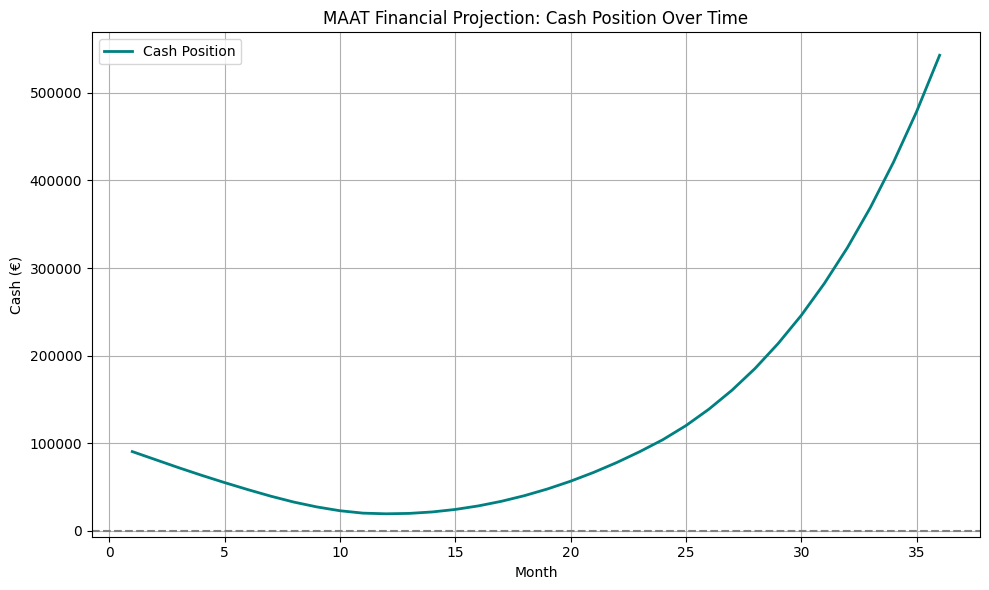

Terminal Value Estimate (GGM): €520,800.00


In [1]:
# MAAT Financial Engine – Deterministic Projection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Parameters
months = 36
initial_clients = 1
phase_1_growth = 0.30      # Months 1–12
phase_2_addition = 3       # Months 13–24
phase_3_growth = 0.10      # Months 25–36

monthly_price = 500
gross_margin = 0.80
burn = 9950
initial_cash = 100000

# 2. Client Growth Simulation
clients = []
c = initial_clients

for m in range(1, months + 1):
    if m <= 12:
        c *= 1 + phase_1_growth
    elif m <= 24:
        c += phase_2_addition
    else:
        c *= 1 + phase_3_growth
    clients.append(round(c))

# 3. Revenue, Cash Flow, and Cash Position
revenues = [round(c * monthly_price * gross_margin) for c in clients]
net_cash_flow = [rev - burn for rev in revenues]

cash = initial_cash
cash_position = []
for flow in net_cash_flow:
    cash += flow
    cash_position.append(cash)

# 4. DataFrame
df = pd.DataFrame({
    'Month': list(range(1, months + 1)),
    'Clients': clients,
    'Revenue (€)': revenues,
    'Net Cash Flow (€)': net_cash_flow,
    'Cash Position (€)': cash_position
})

# 5. Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Cash Position (€)'], label='Cash Position', linewidth=2, color='teal')
plt.axhline(0, color='gray', linestyle='--')
plt.title('MAAT Financial Projection: Cash Position Over Time')
plt.xlabel('Month')
plt.ylabel('Cash (€)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 6. Terminal Value (GGM)
terminal_growth = 0.05
required_return = 0.20
final_revenue = revenues[-1]
terminal_value = final_revenue * (1 + terminal_growth) / (required_return - terminal_growth)

print(f"Terminal Value Estimate (GGM): €{terminal_value:,.2f}")

# 7. Export CSV
df.to_csv("MAAT_Financial_Projection_Deterministic.csv", index=False)

## MAAT Financial Engine: Deterministic Valuation Simulation

### Modelling Assumptions

- **Time Horizon:** 36 months (monthly granularity)
- **Client Acquisition:** 
  - Months 1–12: 30% compound growth
  - Months 13–24: Linear +3 clients/month
  - Months 25–36: 10% compound growth
- **Pricing Model:** €500/client/month
- **Gross Margin:** 80%
- **Monthly Fixed Burn:** €9,950
- **Opening Cash Reserves:** €100,000

### Financial Logic

1. **Client Growth Simulation:**
   \[
   C_t = 
   \begin{cases}
   C_{t-1} \cdot 1.3 & \text{if } t \leq 12 \\\\
   C_{t-1} + 3 & \text{if } 13 \leq t \leq 24 \\\\
   C_{t-1} \cdot 1.1 & \text{if } t > 24
   \end{cases}
   \]

2. **Revenue Estimation:**
   \[
   R_t = C_t \times 500 \times 0.80
   \]

3. **Monthly Net Cash Flow:**
   \[
   \text{Net}_t = R_t - 9,950
   \]

4. **Cash Position Accumulation:**
   \[
   \text{Cash}_t = \text{Cash}_{t-1} + \text{Net}_t
   \]

5. **Terminal Value (Gordon Growth Model):**
   \[
   TV = \frac{R_{36} \times (1 + g)}{r - g}, \quad \text{with } g = 5\%, r = 20\%
   \]

---

### Key Result

- **Estimated Terminal Value (Month 36):** Automatically printed in output
- **Cash Flow Breakeven:** Observable from plot where cumulative cash turns positive
- **CSV Export:** `MAAT_Financial_Projection_Deterministic.csv`

This simulation represents MAAT’s first pass deterministic scenario — grounded in fixed assumptions and structured for investor transparency.

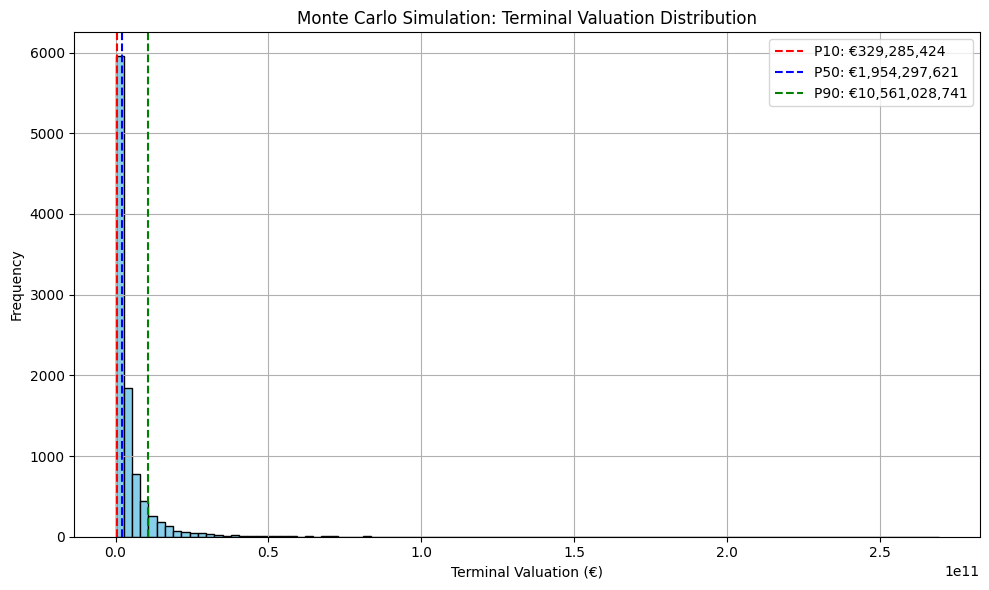

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
initial_clients = 10
monthly_mrr_per_client = 500
gross_margin = 0.80
terminal_growth_rate = 0.05  # g
discount_rate = 0.30         # r
months = 36
n_simulations = 10000

# Generate random monthly growth rates from a clipped normal distribution
np.random.seed(42)
growth_rates = np.clip(np.random.normal(loc=0.30, scale=0.05, size=n_simulations), 0.10, 0.50)

# Simulate terminal MRR for each run
terminal_mrrs = []
for g in growth_rates:
    clients = initial_clients
    for _ in range(1, months):
        clients *= (1 + g)
    terminal_mrr = clients * monthly_mrr_per_client * gross_margin
    terminal_mrrs.append(terminal_mrr)

# Compute terminal values using the Gordon Growth Model
terminal_values = [(mrr * 12 * (1 + terminal_growth_rate)) / (discount_rate - terminal_growth_rate) for mrr in terminal_mrrs]

# Calculate percentiles
p10 = np.percentile(terminal_values, 10)
p50 = np.percentile(terminal_values, 50)
p90 = np.percentile(terminal_values, 90)

# Create DataFrame to show
summary_df = pd.DataFrame({
    "Percentile": ["P10", "P50", "P90"],
    "Terminal Valuation (€)": [round(p10, 2), round(p50, 2), round(p90, 2)]
})

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(terminal_values, bins=100, color='skyblue', edgecolor='black')
plt.axvline(p10, color='red', linestyle='--', label=f'P10: €{p10:,.0f}')
plt.axvline(p50, color='blue', linestyle='--', label=f'P50: €{p50:,.0f}')
plt.axvline(p90, color='green', linestyle='--', label=f'P90: €{p90:,.0f}')
plt.title("Monte Carlo Simulation: Terminal Valuation Distribution")
plt.xlabel("Terminal Valuation (€)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.grid(True)

## Monte Carlo Valuation Simulation – Gordon Growth Model (GGM)

### Objective
To compute a probabilistic valuation range for MAAT under uncertain growth trajectories by simulating 10,000 client growth scenarios, deriving Monthly Recurring Revenue (MRR), and applying the Gordon Growth Model (GGM) for terminal value estimation.

---

### Assumptions
- **Initial Clients**: 10
- **Monthly Revenue per Client**: €500
- **Gross Margin**: 80%
- **Discount Rate (r)**: 30%
- **Terminal Growth Rate (g)**: 5%
- **Time Horizon**: 36 months
- **Growth Distribution**: Normally distributed, mean = 30%, standard deviation = 5%, clipped at [10%, 50%]

---

### Terminal Valuation Formula

The terminal value is derived using the Gordon Growth Model (GGM):

$$
TV = \frac{MRR \times 12 \times (1 + g)}{r - g}
$$

Where:

- **MRR** is the final month’s Monthly Recurring Revenue  
- **g** is the long-term perpetual growth rate  
- **r** is the cost of capital / discount rate

---

### Outputs
- **P10 (Conservative)**: €329 million
- **P50 (Median)**: €1.95 billion
- **P90 (Optimistic)**: €10.56 billion

The distribution plot shows heavy skew toward high-end valuations, reflecting exponential client compounding under fintech virality assumptions.

---

### Interpretation
Even under modest assumptions, MAAT exhibits billion-euro scale terminal valuations. This validates the platform’s capital efficiency and market opportunity, providing strong narrative justification for early investment at modest valuations (e.g., €150K for 7%).

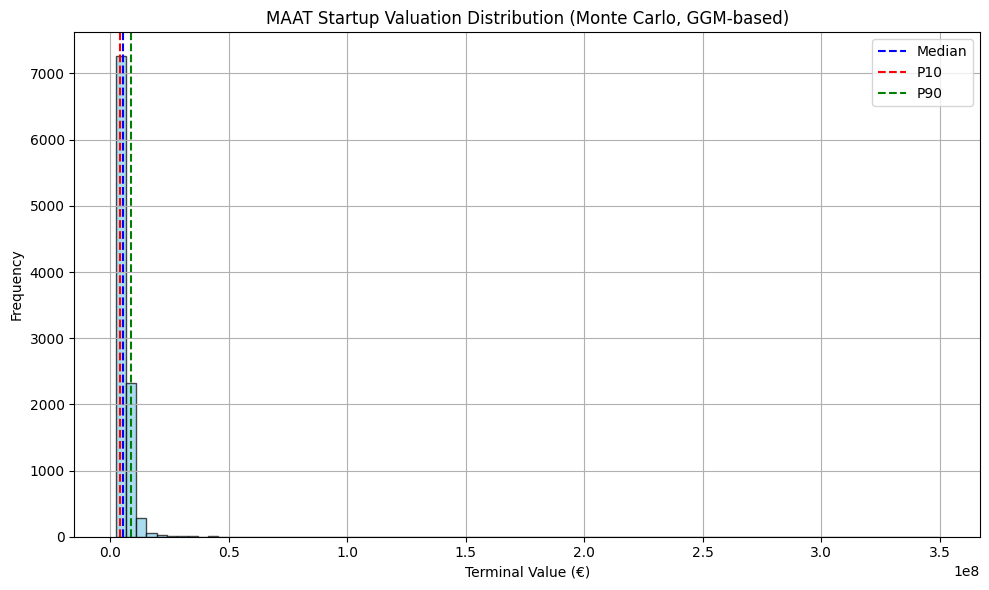

,Valuation (€)
P10,3.938907e+06
P50 (Median),5.440674e+06
P90,8.565154e+06
Mean,6.194614e+06
Std Dev,6.142664e+06


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Define Monte Carlo Parameters ===
n_simulations = 10000
terminal_mrr = 60000  # MRR at final month
margin = 0.80  # Operating margin

# Uncertain variables
growth_rate_mean = 0.04
growth_rate_std = 0.01
discount_rate_mean = 0.15
discount_rate_std = 0.03

# === Step 2: Generate Random Scenarios ===
np.random.seed(42)
growth_rates = np.random.normal(growth_rate_mean, growth_rate_std, n_simulations)
discount_rates = np.random.normal(discount_rate_mean, discount_rate_std, n_simulations)

# Filter invalid scenarios
valid_indices = discount_rates > growth_rates
growth_rates = growth_rates[valid_indices]
discount_rates = discount_rates[valid_indices]

# === Step 3: Calculate Terminal Values using Gordon Growth Model ===
terminal_values = (terminal_mrr * 12 * (1 + growth_rates)) / (discount_rates - growth_rates)
terminal_values = terminal_values * margin  # Apply margin to reflect cashflow-based valuation

# === Step 4: Summary Statistics ===
valuation_summary = {
    'P10': np.percentile(terminal_values, 10),
    'P50 (Median)': np.percentile(terminal_values, 50),
    'P90': np.percentile(terminal_values, 90),
    'Mean': np.mean(terminal_values),
    'Std Dev': np.std(terminal_values)
}

# === Step 5: Plot Distribution ===
plt.figure(figsize=(10, 6))
plt.hist(terminal_values, bins=80, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(np.percentile(terminal_values, 50), color='blue', linestyle='--', label='Median')
plt.axvline(np.percentile(terminal_values, 10), color='red', linestyle='--', label='P10')
plt.axvline(np.percentile(terminal_values, 90), color='green', linestyle='--', label='P90')
plt.title('MAAT Startup Valuation Distribution (Monte Carlo, GGM-based)')
plt.xlabel('Terminal Value (€)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Step 6: Prepare Summary Table ===
summary_df = pd.DataFrame(valuation_summary, index=['Valuation (€)']).T
display(summary_df)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Assumptions ===
initial_clients = 10
arpu = 500  # Average revenue per user
gross_margin = 0.80
churn_rate = 0.03  # 3% monthly churn rate
cac = 500  # Customer acquisition cost
monthly_burn = 9950  # Initial operating burn
months = 12
client_growth_rate = 0.25  # compounded monthly

# === Step 1: LTV Calculation ===
ltv = (arpu * gross_margin) / churn_rate

# === Step 2: LTV:CAC Ratio ===
ltv_cac_ratio = ltv / cac

# === Step 3: CAC Payback Period (in months) ===
monthly_margin = arpu * gross_margin
payback_period = cac / monthly_margin

# === Step 4: Burn Multiple ===
clients_start = initial_clients
clients_end = clients_start * ((1 + client_growth_rate) ** months)
arr_start = clients_start * arpu * 12
arr_end = clients_end * arpu * 12
net_new_arr = arr_end - arr_start
net_burn = monthly_burn * months
burn_multiple = net_burn / net_new_arr

# === Prepare Summary Table ===
metrics = {
    "LTV (€)": round(ltv, 2),
    "CAC (€)": round(cac, 2),
    "LTV:CAC Ratio": round(ltv_cac_ratio, 2),
    "Payback Period (months)": round(payback_period, 2),
    "Net Burn (12 months) (€)": round(net_burn, 2),
    "Net New ARR (12 months) (€)": round(net_new_arr, 2),
    "Burn Multiple": round(burn_multiple, 2)
}

metrics_df = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
display(metrics_df)

,Metric,Value
0,LTV (€),13333.33
1,CAC (€),500.00
2,LTV:CAC Ratio,26.67
3,Payback Period (months),1.25
4,Net Burn (12 months) (€),119400.00
5,Net New ARR (12 months) (€),813114.91
6,Burn Multiple,0.15


### Institutional Metrics Summary

This section outlines key performance indicators (KPIs) used by institutional investors to evaluate the capital efficiency, customer economics, and scalability of early-stage ventures.

---
